In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from xgboost import XGBClassifier
import statistics

# EDA

In [2]:
df = pd.read_csv('telco_churn_dataset - telco_churn_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,204.8,106,15.5,4,0,354,705,119,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,169.5,106,10.3,9,5,326,292,75,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,...,126.8,82,8.0,4,2,324,1840,257,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,...,130.0,92,8.8,4,0,228,1389,180,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,...,236.5,137,12.0,2,1,294,170,1,340.4,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 35 columns):
customerID                   3333 non-null object
gender                       3333 non-null object
SeniorCitizen                3333 non-null int64
MaritalStatus                3333 non-null object
Dependents                   3333 non-null object
tenure                       3333 non-null int64
PhoneService                 3333 non-null object
MultipleLines                3333 non-null object
InternetService              3333 non-null object
OnlineSecurity               3333 non-null object
OnlineBackup                 3333 non-null object
DeviceProtection             3333 non-null object
TechSupport                  3333 non-null object
StreamingTV                  3333 non-null object
StreamingMovies              3333 non-null object
Contract                     3333 non-null object
PaperlessBilling             3333 non-null object
PaymentMethod                3333 non-null ob

In [4]:
df.isna().sum()

customerID                   0
gender                       0
SeniorCitizen                0
MaritalStatus                0
Dependents                   0
tenure                       0
PhoneService                 0
MultipleLines                0
InternetService              0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
Contract                     0
PaperlessBilling             0
PaymentMethod                0
InternationalPlan            0
VoiceMailPlan                0
NumbervMailMessages          0
TotalDayMinutes              0
TotalDayCalls                0
TotalEveMinutes              0
TotalEveCalls                0
TotalNightMinutes            0
TotalNightCalls              0
TotalIntlMinutes             0
TotalIntlCalls               0
CustomerServiceCalls         0
TotalCall                    0
TotalHighBandwidthMinutes    0
TotalHig

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(3328, 35)

In [7]:
df.Churn.value_counts()

No     2675
Yes     653
Name: Churn, dtype: int64

In [8]:
continuous = df.describe().columns
continuous

Index(['SeniorCitizen', 'tenure', 'NumbervMailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes',
       'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall',
       'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue'],
      dtype='object')

## Is there a higher average tenure with people who stay or leave?

In [9]:
tenure_churn = df.drop(df.columns.difference(['tenure','Churn']), 1)

In [10]:
no_churn = tenure_churn.loc[tenure_churn['Churn'] == 'No']
no_churn.tenure.mean()

31.377570093457944

In [11]:
yes_churn = tenure_churn.loc[tenure_churn['Churn'] == 'Yes']
yes_churn.tenure.mean()

14.385911179173048

In [12]:
# There is a higher average tenure amongst no churn group, meaning people leave quicker

## Are more people leaving with a higher average or median bill?

### Average

In [13]:
revenue_churn = df.drop(df.columns.difference(['Churn', 'TotalRevenue']), 1)
revenue_churn.head()

,TotalRevenue,Churn
0,593.3,No
1,280.9,Yes
2,571.5,No
3,7904.3,No
4,340.4,No


In [14]:
no_churn = revenue_churn.loc[revenue_churn['Churn'] == 'No']
no_churn.TotalRevenue.mean()

1797.4495700934567

In [15]:
yes_churn = revenue_churn.loc[tenure_churn['Churn'] == 'Yes']
yes_churn.TotalRevenue.mean()

1164.7442572741188

In [16]:
# A higher average total_revenue amongst customers who do not leave

### Median

In [17]:
print(statistics.median(no_churn.TotalRevenue))
print(statistics.median(yes_churn.TotalRevenue))

978.0
487.1


In [18]:
# The people who leave have a lower median total_revenue then people who stay

## Make ints astype floats

In [19]:
def float_columns(df):
    for col in df.columns:
        if df[col].dtypes == 'int64':
            df[col] = df[col].astype(float)

In [20]:
float_columns(df)

In [21]:
# check results to verify function worked correctly

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3328 entries, 0 to 3332
Data columns (total 35 columns):
customerID                   3328 non-null object
gender                       3328 non-null object
SeniorCitizen                3328 non-null float64
MaritalStatus                3328 non-null object
Dependents                   3328 non-null object
tenure                       3328 non-null float64
PhoneService                 3328 non-null object
MultipleLines                3328 non-null object
InternetService              3328 non-null object
OnlineSecurity               3328 non-null object
OnlineBackup                 3328 non-null object
DeviceProtection             3328 non-null object
TechSupport                  3328 non-null object
StreamingTV                  3328 non-null object
StreamingMovies              3328 non-null object
Contract                     3328 non-null object
PaperlessBilling             3328 non-null object
PaymentMethod                3328 non-nul

In [22]:
# look at all columns and drop unncessary ones
pd.set_option('display.max_columns', None)
df.drop(columns = ['gender', 'customerID'], inplace = True)

## Split data and run a logistic regression model

In [23]:
df.head()

,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue,Churn
0,0.0,Yes,Yes,9.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0.0,168.8,137.0,241.4,107.0,204.8,106.0,15.5,4.0,0.0,354.0,705.0,119.0,593.3,No
1,0.0,No,No,4.0,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0.0,122.2,112.0,131.7,94.0,169.5,106.0,10.3,9.0,5.0,326.0,292.0,75.0,280.9,Yes
2,0.0,No,Yes,9.0,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36.0,178.7,134.0,178.6,102.0,126.8,82.0,8.0,4.0,2.0,324.0,1840.0,257.0,571.5,No
3,1.0,Yes,No,71.0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0.0,190.2,68.0,262.2,64.0,130.0,92.0,8.8,4.0,0.0,228.0,1389.0,180.0,7904.3,No
4,1.0,No,No,7.0,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0.0,67.7,68.0,195.7,86.0,236.5,137.0,12.0,2.0,1.0,294.0,170.0,1.0,340.4,No


In [24]:
y = df['Churn']
X = df.drop(columns = ['Churn', 'tenure'], axis = 1)

## Make categorical variable ordinal with LabelEncoder then OneHotEncoder

In [25]:
cat = X.select_dtypes(include=['object','category'])
cont = X.select_dtypes(exclude=['object','category'])

In [26]:
enc = OneHotEncoder(categories='auto', drop = 'first')
X = enc.fit_transform(cat).toarray()

In [27]:
X

array([[1., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [28]:
cat_df=pd.DataFrame(X, columns = enc.get_feature_names(cat.columns))

In [29]:
cont.isna().sum()

SeniorCitizen                0
NumbervMailMessages          0
TotalDayMinutes              0
TotalDayCalls                0
TotalEveMinutes              0
TotalEveCalls                0
TotalNightMinutes            0
TotalNightCalls              0
TotalIntlMinutes             0
TotalIntlCalls               0
CustomerServiceCalls         0
TotalCall                    0
TotalHighBandwidthMinutes    0
TotalHighLatencyMinutes      0
TotalRevenue                 0
dtype: int64

In [30]:
combined = pd.concat([cat_df, cont, y], axis = 1)

In [31]:
combined.dropna(inplace = True)

## Logistic Regression on Data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(X_train,y_train)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_hat = lr.predict(X_train)

In [36]:
X_train

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [37]:
y_hat

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [38]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [39]:
con_mat = pd.crosstab(y_train, y_hat, rownames = ['True'], colnames = ['Predicted'])
con_mat

Predicted,No,Yes
True,,
No,1988,141
Yes,272,261


In [40]:
f1 = f1_score(y_train, y_hat, pos_label = 'Yes')
f1

0.5582887700534759

In [41]:
acc = accuracy_score(y_train, y_hat)
acc

0.8448534936138242

## Using AdaBoostClassifier, GradientBoostingClassifier, and XGBClassifier

In [42]:
abc = AdaBoostClassifier(random_state= 42)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [43]:
print(f'average cross val score is :{cross_val_score(abc, X_train,y_train).mean()}')
print(f'abc score is: {abc.score(X_train, y_train)}')

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


average cross val score is :0.8362083867162874
abc score is: 0.8433508640120211


In [44]:
abc.feature_importances_

array([0.06, 0.02, 0.02, 0.1 , 0.  , 0.  , 0.06, 0.  , 0.04, 0.02, 0.06,
       0.  , 0.02, 0.  , 0.08, 0.02, 0.08, 0.04, 0.04, 0.02, 0.08, 0.1 ,
       0.06, 0.04, 0.04])

Text(0.5, 0, "['SeniorCitizen', 'MaritalStatus', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan', 'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue']")

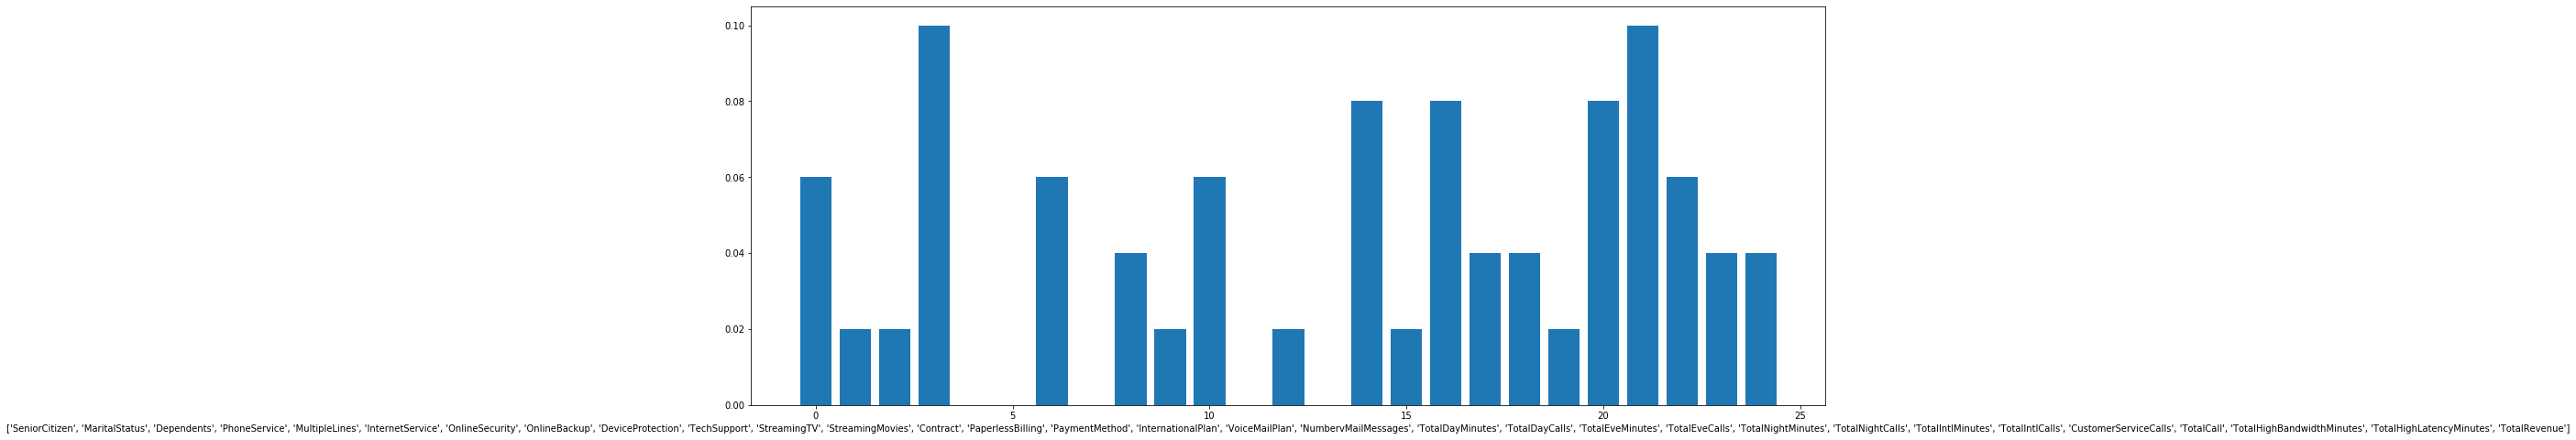

In [45]:
X = df.drop(columns = ['Churn', 'tenure'], axis = 1)
plt.figure(figsize = (21,8))
plt.bar(range(len(abc.feature_importances_)), abc.feature_importances_)
plt.xlabel([Xi for Xi in X.columns])

In [315]:
columns[14
       ]

'PaperlessBilling'

In [47]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [48]:
print('average cross val score is: ',cross_val_score(gbc, X_train, y_train).mean())
print('gbc score is: ', gbc.score(X_train,y_train))

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


average cross val score is:  0.839225794643402
gbc score is:  0.8598797896318557


In [49]:
gbc.feature_importances_

array([0.01044112, 0.00241828, 0.00902243, 0.26584428, 0.00183978,
       0.00777875, 0.01038759, 0.00044371, 0.00390411, 0.00295097,
       0.00956195, 0.00364062, 0.01453604, 0.00475736, 0.02125084,
       0.00048849, 0.05447476, 0.20612488, 0.18269504, 0.014329  ,
       0.00908639, 0.05443262, 0.00298574, 0.06955051, 0.03705474])

Text(0.5, 0, "['SeniorCitizen', 'MaritalStatus', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan', 'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue']")

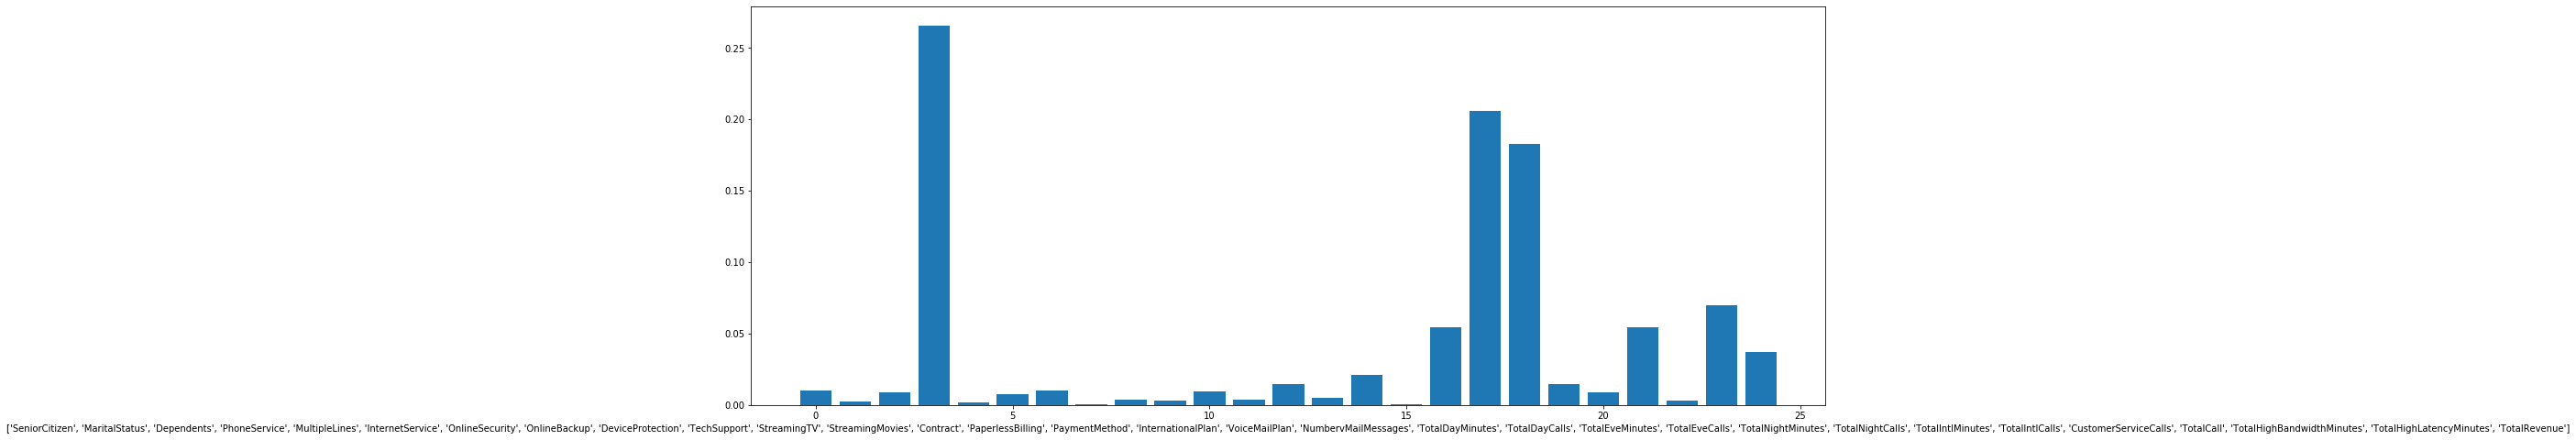

In [50]:
X = df.drop(columns = ['Churn', 'tenure'], axis = 1)
plt.figure(figsize = (21,8))
plt.bar(range(len(gbc.feature_importances_)), gbc.feature_importances_)
plt.xlabel([Xi for Xi in X.columns])

In [53]:
columns = [Xi for Xi in X.columns]
columns[3]

'PhoneService'

In [54]:
columns[17]

'NumbervMailMessages'

In [55]:
columns[18]

'TotalDayMinutes'

In [320]:
# Based on the graph, the most important features are: Tenure, VoicemailPlan, NumberVmailMessages,
# Totaleveminutes, and Totalnightmin

In [154]:
xc = XGBClassifier()

In [155]:
xc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [159]:
print('average xc cross val score: ', cross_val_score(xc, X_train, y_train).mean())
print('xc score: ', xc.score(X_train,y_train))

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


average xc cross val score:  0.8418467791353924
xc score:  0.8632607062359129


In [182]:
type(xc.feature_importances_ )

numpy.ndarray

In [280]:
columns[5]

'MultipleLines'

Text(0.5, 0, "['SeniorCitizen', 'MaritalStatus', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternationalPlan', 'VoiceMailPlan', 'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes', 'TotalRevenue']")

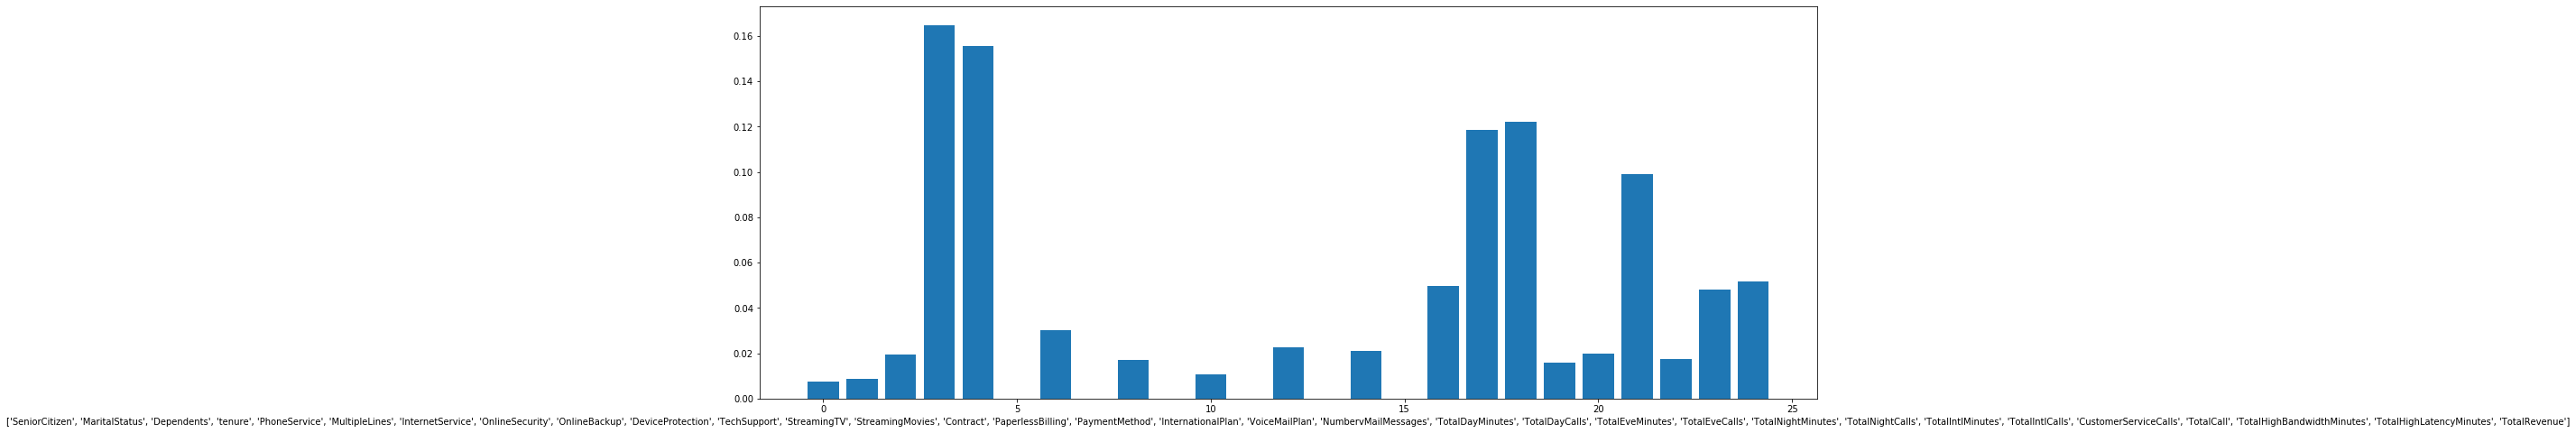

In [181]:
X = df.drop(columns = ['Churn'], axis = 1)
plt.figure(figsize = (21,8))
plt.bar(range(len(xc.feature_importances_)), xc.feature_importances_)
plt.xlabel([Xi for Xi in X.columns])

In [282]:
# Based on this graph, the most important features are: Tenure, MultipleLines, NumberVmailmessage, VoicemailPlan, 
#  and Totaleveminutes

## Attempting to make scores better by dropping features

In [203]:
X = df.drop(columns = ['Churn', 'MultipleLines', 'OnlineSecurity', 'DeviceProtection',
                       'StreamingTV', 'Contract', 'PaymentMethod', 'TotalRevenue'])
y = df['Churn']

In [190]:
cat = X.select_dtypes(include=['object','category'])
cont = X.select_dtypes(exclude=['object','category'])
enc = OneHotEncoder(categories='auto', drop = 'first')
X = enc.fit_transform(cat).toarray()
cat_df=pd.DataFrame(X, columns = enc.get_feature_names(cat.columns))
combined = pd.concat([cat_df, cont, y], axis = 1)
combined.dropna(inplace = True)


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

## Modeling on new transformed data and graphing

In [204]:
lr.fit(X_train,y_train)

/Users/joseph/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
y_pred = lr.predict(X_train)

In [208]:
# LogisticRegression on dropped features

lr.score(X_train, y_train)

0.8129226145755072

In [211]:
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.8223140495867769

In [213]:
abc.fit(X_train, y_train)
abc.score(X_train, y_train)

0.8144252441773103

In [215]:
xc.fit(X_train, y_train)
xc.score(X_train, y_train)

0.8223140495867769

Text(0.5, 0, "['SeniorCitizen', 'MaritalStatus', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'PaperlessBilling', 'InternationalPlan', 'VoiceMailPlan', 'NumbervMailMessages', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes', 'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls', 'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls', 'TotalCall', 'TotalHighBandwidthMinutes', 'TotalHighLatencyMinutes']")

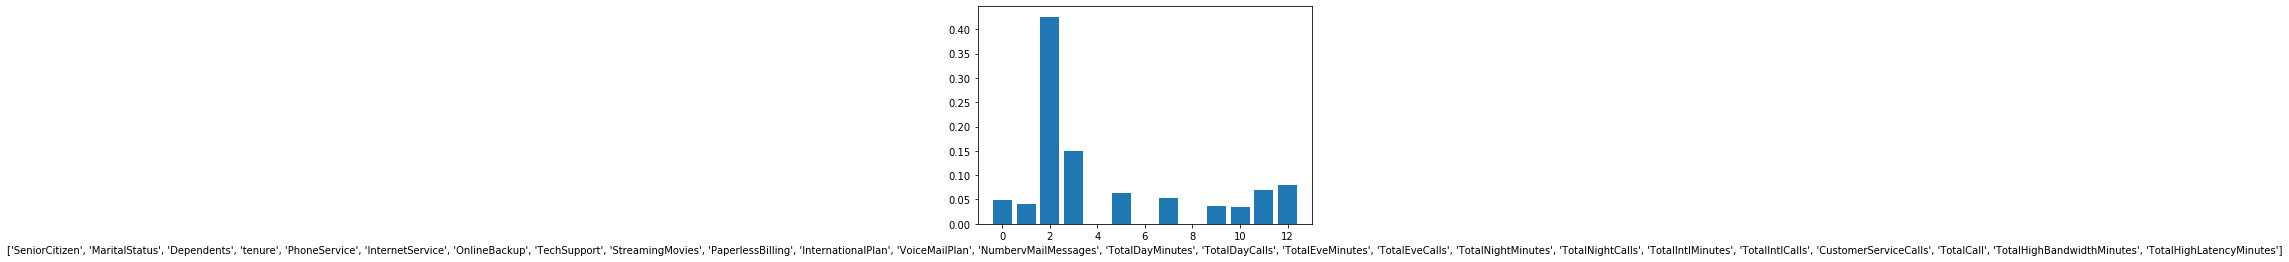

In [218]:
names = [Xi for Xi in X.columns]
plt.bar(range(len(xc.feature_importances_)), xc.feature_importances_)
plt.xlabel(names)

Based on the graphs and scores, highest reason for churn is tenure. Followed by 